In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import pearsonr


In [2]:
df=pd.read_csv('D:/playstore-analysis.csv')

In [3]:
df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews     Size     Installs  Type Price Content Rating  \
0     159  19000.0      10,000+  Free     0       Everyone   
1     967  14000.0     500,000+  Free     0       Everyone   
2   87510   8700.0   5,000,000+  Free     0       Everyone   
3  215644  25000.0  50,000,000+  Free     0           Teen   
4     967   2800.0     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [5]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

# Task-1  Data CleanUp - Missing Value Treatment 

a) Drop the records where rating is missing since rating is the target study

In [6]:
df.dropna(how='any',subset=['Rating'],axis=0,inplace=True)

In [7]:
df.Rating.isnull().sum()

0

b) Checking the null values for Andoroid Ver column 

In [8]:
df.loc[df['Android Ver'].isnull()]

App         Category  Rating  \
4453                    [substratum] Vacuum: P  PERSONALIZATION     4.4   
4490                      Pi Dark [substratum]  PERSONALIZATION     4.5   
10472  Life Made WI-Fi Touchscreen Photo Frame              1.9    19.0   

      Reviews         Size Installs  Type     Price Content Rating  \
4453      230  11000.00000   1,000+  Paid     $1.49       Everyone   
4490      189   2100.00000  10,000+  Free         0       Everyone   
10472    3.0M  21516.52952     Free     0  Everyone            NaN   

                  Genres    Last Updated Current Ver Android Ver  
4453     Personalization   July 20, 2018         4.4         NaN  
4490     Personalization  March 27, 2018         1.1         NaN  
10472  February 11, 2018          1.0.19  4.0 and up         NaN

Yes all three records have same Problem i.e all are NaN

(ii) Drop the 3rd record i.e. record for “Life Made WIFI …”

In [9]:
df.drop([10472],inplace=True)

In [10]:
df.loc[df['Android Ver'].isnull()]

App         Category  Rating Reviews     Size  \
4453  [substratum] Vacuum: P  PERSONALIZATION     4.4     230  11000.0   
4490    Pi Dark [substratum]  PERSONALIZATION     4.5     189   2100.0   

     Installs  Type  Price Content Rating           Genres    Last Updated  \
4453   1,000+  Paid  $1.49       Everyone  Personalization   July 20, 2018   
4490  10,000+  Free      0       Everyone  Personalization  March 27, 2018   

     Current Ver Android Ver  
4453         4.4         NaN  
4490         1.1         NaN

iii. Replace remaining missing values with the mode

In [11]:
df['Android Ver'].fillna(df['Android Ver'].mode()[0],inplace=True)

(c) Current ver – replace with most common value

In [12]:
df['Current Ver'].fillna(df['Current Ver'].mode()[0],inplace=True)

#  Task 2. Data clean up – correcting the data types

(a) Which all variables need to be brought to numeric types?

In [13]:
df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews     Size     Installs  Type Price Content Rating  \
0     159  19000.0      10,000+  Free     0       Everyone   
1     967  14000.0     500,000+  Free     0       Everyone   
2   87510   8700.0   5,000,000+  Free     0       Everyone   
3  215644  25000.0  50,000,000+  Free     0           Teen   
4     967   2800.0     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

In [14]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

So after analyzing the data types of each column the variables which need to be brought to numneric types are:- Reviews,Installs,Price

(b) Price variable – remove $ sign and convert to float

In [15]:
price=[]
for i in df['Price']:
    if i[0]=='$':
        price.append(i[1:])
    else:
        price.append(i)
        

In [16]:
df['Price']=price  # removing $sign from Price Column

In [17]:
df.drop(labels=df[df['Price']=='Everyone'].index,inplace=True) # removing the row which contains everyone as an value in price column

In [18]:
df['Price']=df['Price'].astype('float')

In [19]:
df['Price'].dtypes

dtype('float64')

(c) Installs – remove ‘,’ and ‘+’ sign, convert to integer

In [20]:
install=[]
for i in df['Installs']:
    install.append(i.replace(',','').replace('+','')) # replacement of ','&'+' with ''

df['Installs']=install
df['Installs']=df['Installs'].astype('int') # conversion of object to int

In [21]:
df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews     Size  Installs  Type  Price Content Rating  \
0     159  19000.0     10000  Free    0.0       Everyone   
1     967  14000.0    500000  Free    0.0       Everyone   
2   87510   8700.0   5000000  Free    0.0       Everyone   
3  215644  25000.0  50000000  Free    0.0           Teen   
4     967   2800.0    100000  Free    0.0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

In [22]:
df['Installs'].dtypes


dtype('int32')

 (d) Convert all other identified columns to numeric

In [23]:
df['Reviews']=df['Reviews'].astype('int')

In [24]:
df['Reviews'].dtypes

dtype('int32')

# Task 3 - Sanity checks – check for the following and handle accordingly

(a) Avg. rating should be between 1 and 5, as only these values are allowed on the play 
    store.
    
    (i). Are there any such records? Drop if so.

In [25]:
df.loc[df['Rating']<1] | df.loc[df['Rating']>5]

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []

So there are no records having rating<1 or rating >5

(c) Reviews should not be more than installs as only those who installed can review the 
app.

     (i). Are there any such records? Drop if so.
   

In [26]:
df.loc[df['Installs']<df['Reviews']]

App   Category  Rating  Reviews         Size  \
2454             KBA-EZ Health Guide    MEDICAL     5.0        4  25000.00000   
4663   Alarmy (Sleep If U Can) - Pro  LIFESTYLE     4.8    10249  21516.52952   
5917                        Ra Ga Ba       GAME     5.0        2  20000.00000   
6700                Brick Breaker BR       GAME     5.0        7  19000.00000   
7402            Trovami se ci riesci       GAME     5.0       11   6100.00000   
8591                         DN Blog     SOCIAL     5.0       20   4200.00000   
10697                        Mu.F.O.       GAME     5.0        2  16000.00000   

       Installs  Type  Price Content Rating     Genres      Last Updated  \
2454          1  Free   0.00       Everyone    Medical    August 2, 2018   
4663      10000  Paid   2.49       Everyone  Lifestyle     July 30, 2018   
5917          1  Paid   1.49       Everyone     Arcade  February 8, 2017   
6700          5  Free   0.00       Everyone     Arcade     July 23, 2018   
7402         10  Free   0.00       Everyone     Arcade    March 11, 2017   
8591         10  Free   0.00           Teen     Social     July 23, 2018   
10697         1  Paid   0.99       Everyone     Arcade     March 3, 2017   

              Current Ver         Android Ver  
2454               1.0.72        4.0.3 and up  
4663   Varies with device  Varies with device  
5917                1.0.4          2.3 and up  
6700                    1          4.1 and up  
7402                  0.1          2.3 and up  
8591                    1          4.0 and up  
10697                   1          2.3 and up

In [27]:
temp=df[df['Installs']<df['Reviews']].index

In [28]:
print(temp) # so these are indexes where installs are less than reviews

Int64Index([2454, 4663, 5917, 6700, 7402, 8591, 10697], dtype='int64')


In [29]:
df.drop(temp,inplace=True)

In [30]:
df[df['Installs']<df['Reviews']]

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []

# Task 4. Identify and handle outliers –

(a) Price column

       i. Make suitable plot to identify outliers in price

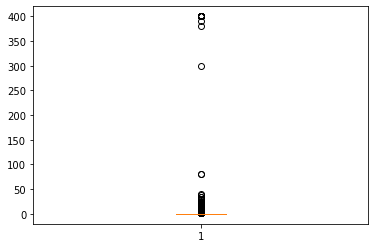

In [31]:
plt.boxplot(df['Price'])
plt.show()

    (ii). Do you expect apps on the play store to cost $200? Check out these cases

In [32]:
df.loc[df['Price']>200]

App   Category  Rating  Reviews     Size  \
4197          most expensive app (H)     FAMILY     4.3        6   1500.0   
4362                      💎 I'm rich  LIFESTYLE     3.8      718  26000.0   
4367        I'm Rich - Trump Edition  LIFESTYLE     3.6      275   7300.0   
5351                       I am rich  LIFESTYLE     3.8     3547   1800.0   
5354                  I am Rich Plus     FAMILY     4.0      856   8700.0   
5355                   I am rich VIP  LIFESTYLE     3.8      411   2600.0   
5356               I Am Rich Premium    FINANCE     4.1     1867   4700.0   
5357             I am extremely Rich  LIFESTYLE     2.9       41   2900.0   
5358                      I am Rich!    FINANCE     3.8       93  22000.0   
5359              I am rich(premium)    FINANCE     3.5      472    965.0   
5362                   I Am Rich Pro     FAMILY     4.4      201   2700.0   
5364  I am rich (Most expensive app)    FINANCE     4.1      129   2700.0   
5366                       I Am Rich     FAMILY     3.6      217   4900.0   
5369                       I am Rich    FINANCE     4.3      180   3800.0   
5373              I AM RICH PRO PLUS    FINANCE     4.0       36  41000.0   

      Installs  Type   Price Content Rating         Genres       Last Updated  \
4197       100  Paid  399.99       Everyone  Entertainment      July 16, 2018   
4362     10000  Paid  399.99       Everyone      Lifestyle     March 11, 2018   
4367     10000  Paid  400.00       Everyone      Lifestyle        May 3, 2018   
5351    100000  Paid  399.99       Everyone      Lifestyle   January 12, 2018   
5354     10000  Paid  399.99       Everyone  Entertainment       May 19, 2018   
5355     10000  Paid  299.99       Everyone      Lifestyle      July 21, 2018   
5356     50000  Paid  399.99       Everyone        Finance  November 12, 2017   
5357      1000  Paid  379.99       Everyone      Lifestyle       July 1, 2018   
5358      1000  Paid  399.99       Everyone        Finance  December 11, 2017   
5359      5000  Paid  399.99       Everyone        Finance        May 1, 2017   
5362      5000  Paid  399.99       Everyone  Entertainment       May 30, 2017   
5364      1000  Paid  399.99           Teen        Finance   December 6, 2017   
5366     10000  Paid  389.99       Everyone  Entertainment      June 22, 2018   
5369      5000  Paid  399.99       Everyone        Finance     March 22, 2018   
5373      1000  Paid  399.99       Everyone        Finance      June 25, 2018   

     Current Ver   Android Ver  
4197           1    7.0 and up  
4362       1.0.0    4.4 and up  
4367       1.0.1    4.1 and up  
5351           2  4.0.3 and up  
5354           3    4.4 and up  
5355       1.1.1    4.3 and up  
5356         1.6    4.0 and up  
5357           1    4.0 and up  
5358           1    4.1 and up  
5359         3.4    4.4 and up  
5362        1.54    1.6 and up  
5364           2  4.0.3 and up  
5366         1.5    4.2 and up  
5369           1    4.2 and up  
5373       1.0.2    4.1 and up

So yes we can expect apps on the play store to cost >= $200

(d)  Limit data to records with price < $30

In [33]:
mr_30=df[df['Price']>30].index
df.drop(mr_30,inplace=True)

In [34]:
count=df.loc[df['Price']>30].index
count.value_counts().sum()

0

So now we have limit our data till price of $30

(c) After dropping the useless records, make the suitable plot again to identify outliers

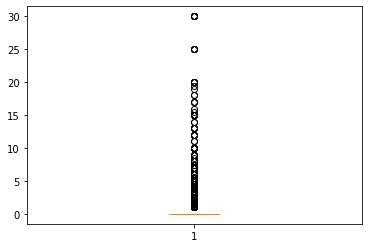

In [35]:
plt.boxplot(df['Price'])
plt.show()

b. Reviews column
    
    (i) Make suitable plot

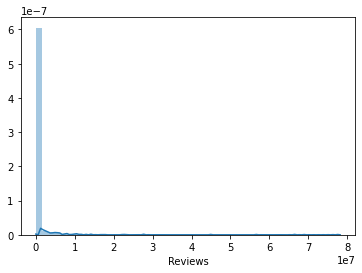

In [36]:
sns.distplot(df['Reviews'])
plt.show()

In [37]:
gt_1m=df[df['Reviews']>1000000].index
df.drop(gt_1m,inplace=True) 

In [38]:
print(gt_1m.value_counts().sum(),'col dropped')

704 col dropped


c. Installs
    
    i. What is the 95th percentile of the installs?

In [39]:
percentile=df['Installs'].quantile(0.95)
print(percentile,'is 95th percentile of Installs')

10000000.0 is 95th percentile of Installs


(d) Drop records having a value more than the 95th percentile

In [40]:
per=df[df['Installs']>percentile].index
df.drop(per,inplace=True)

In [41]:
print(per.value_counts().sum(),'cols dropped')

199 cols dropped


# Data analysis to answer business questions

#  Task - 5. What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower values?

(a) How do you explain this?

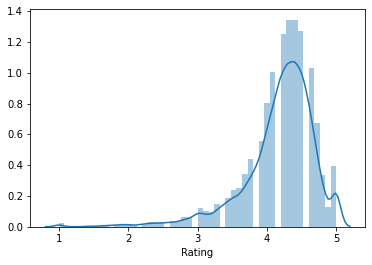

In [42]:
sns.distplot(df['Rating'])
plt.show()

In [43]:
print('The skewness of this distribution is',df['Rating'].skew())

The skewness of this distribution is -1.7434270330647985


(b) What is the implication of this on your analysis?

In [44]:
print('Median of this distribution of rating is',df['Rating'].median())
print('Median of this distribution of rating is',df['Rating'].mean())
print('Median of this distribution of rating is',df['Rating'].mode()[0])

Median of this distribution of rating is 4.3
Median of this distribution of rating is 4.170800237107298
Median of this distribution of rating is 4.3


Thus mode>=median>mean,the distribution is negatively Skewed.Therefore the rating is more skewed towards lower values

# Task 6- What are the top Content Rating values?

(a) Are there any values with very few records?

In [45]:
df['Content Rating'].value_counts()

Everyone           6782
Teen                900
Mature 17+          417
Everyone 10+        332
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

Yes there are records with very less content Rating i.e Adults only 18+ and unrated


b. If yes, drop those as they won’t help in the analysis

In [46]:
temp=df.loc[df['Content Rating']=='Adults only 18+'].index

In [47]:
temp1=df.loc[df['Content Rating']=='Unrated'].index

In [48]:
df.drop(temp,inplace=True)

In [49]:
df.drop(temp1,inplace=True)

In [50]:
df['Content Rating'].value_counts()

Everyone        6782
Teen             900
Mature 17+       417
Everyone 10+     332
Name: Content Rating, dtype: int64

# Task - 7 . Effect of size on rating

(a) Make a joinplot to understand the effect of size on rating

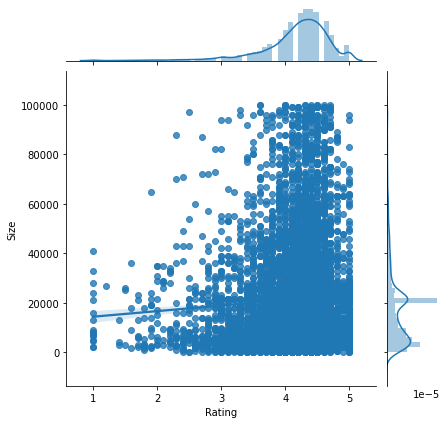

In [51]:
sns.jointplot(y=df['Size'],x=df['Rating'],kind='reg')

(b) Do you see any patterns?

Yes,pattern can be observed between size and rating,i.e they are positively correlated

(c) How do you explain the pattern?

In [52]:
corr,_=pearsonr(df['Size'],df['Rating'])
print('Correlation between Size and Rating is: %.3f' % corr)

Correlation between Size and Rating is: 0.058


Thus there is positive correlation of app size and ratings with the magnitude of 0.058. Hence as th ratings increases th app size also increases

# Task 8- Effect of price on rating

    (a)Make a jointplot (with regression line)

C:\mysql\anaconda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


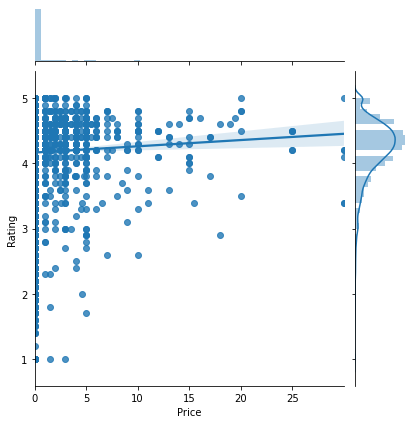

In [53]:
sns.jointplot(y=df['Rating'],x=df['Price'],kind='reg')
plt.show()

(b) What pattern do you see?

Generally on increasing the price,Rating remains almost constant greater than 4


(c) How do you explain the pattern?

Since on increasing the price rating remains almost constant. So there is a weak positive correlation between price and rating 

In [54]:
df.corr()

Rating   Reviews      Size  Installs     Price
Rating    1.000000  0.158547  0.058076  0.118414  0.031479
Reviews   0.158547  1.000000  0.204667  0.736038 -0.073446
Size      0.058076  0.204667  1.000000  0.190741 -0.001054
Installs  0.118414  0.736038  0.190741  1.000000 -0.110507
Price     0.031479 -0.073446 -0.001054 -0.110507  1.000000

Here we also we can see the there is a weak positive correlation with a magnitude of 0.031479 between price and rating

(d) Replot the data, this time with only records with price > 0 

In [57]:
df1=df.loc[df['Price']>0] #Now dataframe df1 will contain all records of apps where price of application is greater than zero


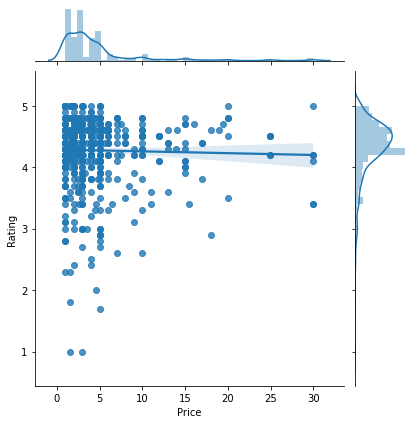

In [59]:
sns.jointplot(y=df1['Rating'],x=df1['Price'],kind='reg')

(e) Does the pattern change?

Yes,on making pairplot between price and rating having price of app>0. I observed that there is a weak negative correlation
between price and rating i.e as the price increases rating decreases. We can also verify it' correlation too by:-

In [60]:
df1.corr()

Rating   Reviews      Size  Installs     Price
Rating    1.000000  0.095986  0.117943  0.063960 -0.025975
Reviews   0.095986  1.000000  0.163959  0.787628 -0.049764
Size      0.117943  0.163959  1.000000  0.119255  0.024912
Installs  0.063960  0.787628  0.119255  1.000000 -0.057710
Price    -0.025975 -0.049764  0.024912 -0.057710  1.000000

Thus here we observe that there is negative correlation between rating and price with a magnitude of 0.025975

(e) What is your overall inference on the effect of price on the rating

Generally on increasing the price rating increases but at very slow rate i.e very weak positive relation with a magnitude of 0.031479

# Task 9. Look at all the numeric interactions together – 

(a) Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'

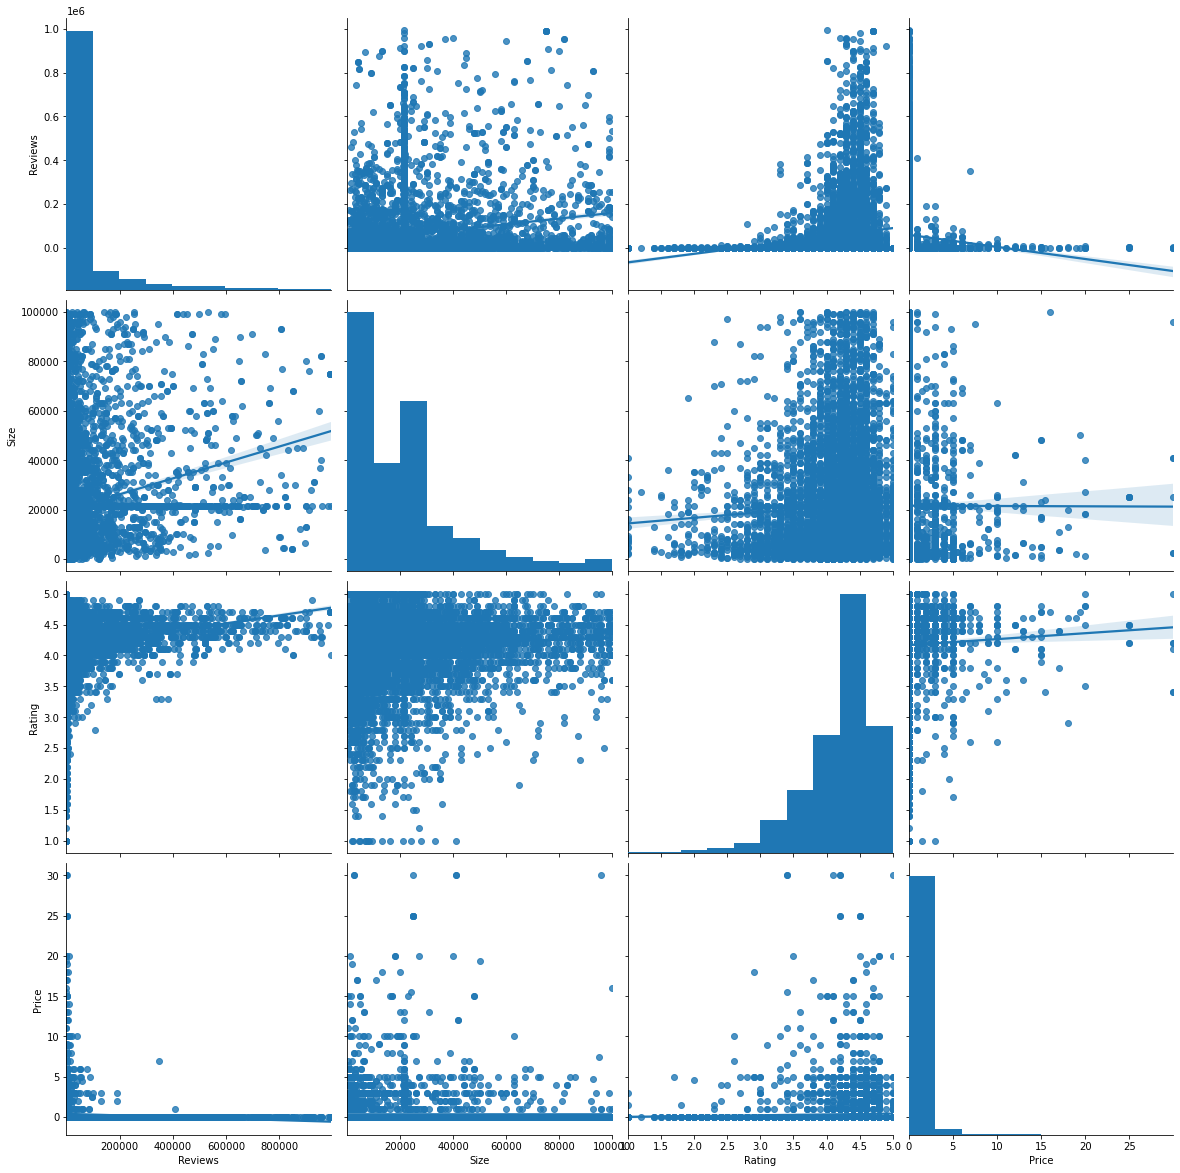

In [82]:

sns.pairplot(df,vars=['Reviews', 'Size', 'Rating', 'Price'],kind='reg',height=4)

# Task 10- Rating vs. content rating

(a) Make a bar plot displaying the rating for each content rating

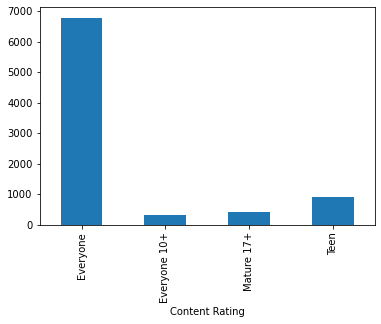

In [105]:
df.groupby(['Content Rating'])['Rating'].count().plot.bar()
plt.show()

(b) Which metric would you use? Mean? Median? Some other quantile?

We must use Median in this case as we are having outliers in rating.As we can see in the above bar plot in Everyone category
rating is drastically much more than the other categories of content rating. So median is best measure of central tedency in this case

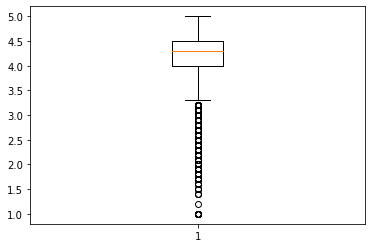

In [108]:
plt.boxplot(df['Rating'])
plt.show()

 (c) Choose the right metric and plot

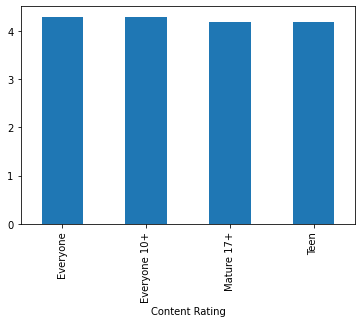

In [112]:
df.groupby(['Content Rating'])['Rating'].median().plot.bar()

# Task 11-  Content rating vs. size vs. rating – 3 variables at a time

(a) Create 5 buckets (20% records in each) based on Size

In [120]:
bins=[0,2000,4000,6000,8000,100000]
df['Bucket Size']=pd.cut(df['Size'],bins,labels=['0-20k','20k-40k','40k-60k','60k-80k','80k-100k'])
pd.pivot_table(df,values='Rating',index='Bucket Size',columns='Content Rating')

Content Rating  Everyone  Everyone 10+  Mature 17+      Teen
Bucket Size                                                 
0-20k           4.047786      4.250000    3.480000  4.405882
20k-40k         4.140583      4.033333    3.875000  4.177778
40k-60k         4.153299      4.341667    4.294286  4.068519
60k-80k         4.151542      3.957143    3.939130  4.263889
80k-100k        4.193549      4.225166    4.116061  4.200271

(b) By Content Rating vs. Size buckets, get the rating (20th percentile) for each combination

In [127]:
temp8=pd.pivot_table(df,values='Rating',index='Bucket Size',columns='Content Rating', aggfunc=lambda x:np.quantile(x,0.2))

In [125]:
temp8

Content Rating  Everyone  Everyone 10+  Mature 17+  Teen
Bucket Size                                             
0-20k                3.7          4.16        2.88  3.94
20k-40k              3.8          3.82        3.36  3.80
40k-60k              3.9          4.20        3.84  3.80
60k-80k              3.8          3.70        3.50  4.00
80k-100k             3.9          4.00        3.90  3.90

c. Make a heatmap of this:-

    i. Annotated


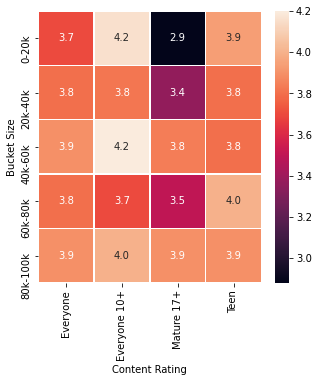

In [139]:
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(temp8,linewidth=.5,fmt='.1f',annot=True)

 (ii) Greens color map

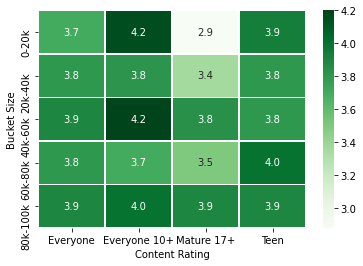

In [135]:
sns.heatmap(temp8,annot=True,linewidth=0.5,cmap='Greens',fmt='.1f')
plt.show()

(d) What’s your inference? Are lighter apps preferred in all categories? Heavier? Some

Based on analysis,it's not true that lighter apps or heavier apps are preffered in all categories. Because app with size
40k-60k and 80k-100k have got highest rating. So in general we conclude that heavier apps are preffered over lighter apps